In [1]:
# import the libraries
import numpy as np
import pandas as pd

In [2]:
# load the data
comcast_data = pd.read_csv("/Users/anandjha/Downloads/Comcast_telecom_complaints_data 2.csv")

In [4]:
# anlayse first few data
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
# checking data types
comcast_data.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [6]:
# converting date to datetime
comcast_data['Date'] = pd.to_datetime(comcast_data['Date']) # convert date to datetime
comcast_data['Date']

0      2015-04-22
1      2015-04-08
2      2015-04-18
3      2015-05-07
4      2015-05-26
          ...    
2219   2015-04-02
2220   2015-06-02
2221   2015-06-09
2222   2015-06-23
2223   2015-06-24
Name: Date, Length: 2224, dtype: datetime64[ns]

In [8]:
#fetching month from Date column
comcast_data['Month'] = pd.DatetimeIndex(comcast_data['Date']).month
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [11]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [10]:
# Extracting count of each ticket grouping by Month
comcast_copy = comcast_data[['Ticket #', 'Month']].copy()
comcast_grp_mnth = comcast_copy.groupby("Month")

comcast_mnth4_count = comcast_grp_mnth.get_group(4)['Ticket #'].count()
comcast_mnth5_count = comcast_grp_mnth.get_group(5)['Ticket #'].count()
comcast_mnth6_count = comcast_grp_mnth.get_group(6)['Ticket #'].count()

comcast_df = pd.DataFrame({'Month':[4,5,6],'Count':[comcast_mnth4_count,comcast_mnth5_count,comcast_mnth6_count]})
comcast_df

,Month,Count
0,4,545
1,5,399
2,6,1280


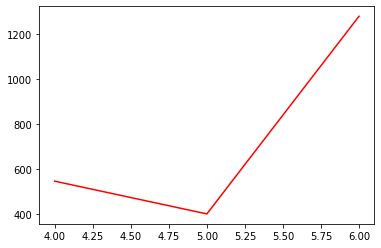

In [12]:
# plotting trendchart
import matplotlib.pyplot as plt

plt.plot(comcast_df['Month'],comcast_df['Count'],color='red')
plt.show()

In [15]:
# Extract count group by date
comcast_data_days = comcast_data.groupby('Date')
days = list(comcast_data_days.groups)
count_days = comcast_data_days['Date'].count().tolist() #counting and grouping to list
count_days_df = pd.DataFrame({'Days':days,'Count':count_days}) # converting to dataframe
count_days_df

,Days,Count
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


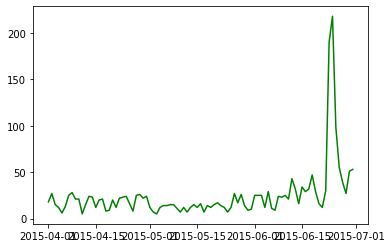

In [16]:
# showing trends using graphs
plt.plot(count_days_df['Days'],count_days_df['Count'],color='green')
plt.show()

In [17]:
# Provide a table with the frequency of complaint types. Which complaint types are maximum i.e., 
# around internet, network issues, or across any other domains.


In [18]:
comcast_data['Customer Complaint'] = comcast_data['Customer Complaint'].str.lower()
comcast_data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,service availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,4
2220,318775,comcast monthly billing for returned modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6
2221,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,6
2222,360489,extremely unsatisfied comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6


In [20]:
def complaint_type (row):
   if ("internet" in row['Customer Complaint']):
      return 'Internet Issues'
   elif ("network" in row['Customer Complaint']) or ("speed" in row['Customer Complaint']):
      return "Network/Speed Issues"
   else:
      return "Other"

comcast_data['Complaint_Type'] = comcast_data.apply (lambda row: complaint_type(row), axis=1)
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Complaint_Type
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Internet Issues
1,223441,payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,Other
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Network/Speed Issues
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,Other
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Other


In [21]:
comcast_copy1 = comcast_data[['Ticket #', 'Complaint_Type']].copy() # copying Ticket & Complaint_Type Column
comcast_grp_complnt = comcast_copy1.groupby("Complaint_Type") # grouping by complaint type

count_int_issu = comcast_grp_complnt.get_group("Internet Issues")['Ticket #'].count() # count for internet issues complaint
count_net_issu = comcast_grp_complnt.get_group("Network/Speed Issues")['Ticket #'].count() # count for network issues complaint
count_other = comcast_grp_complnt.get_group("Other")['Ticket #'].count() # count for other complaints

df_issue = pd.DataFrame({'Issue':["Internet Issues","Network/Speed Issues","Other"],
                         'Count':[count_int_issu,count_net_issu,count_other]})
df_issue

,Issue,Count
0,Internet Issues,532
1,Network/Speed Issues,87
2,Other,1605


In [22]:
# Create a new categorical variable with value as Open and Closed. 
# Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [23]:
comcast_data['Status'] = comcast_data['Status'].str.lower()
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Complaint_Type
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,closed,No,4,Internet Issues
1,223441,payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,closed,No,4,Other
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,closed,Yes,4,Network/Speed Issues
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,open,Yes,5,Other
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,solved,No,5,Other


In [25]:
def new_status(row):
   if ("open" in row['Status']) or ("pending" in row['Status']): # self explanatory as per problem
      return 'Open'
   elif ("closed" in row['Status']) or ("solved" in row['Status']):
      return "Closed"
   else:
      return "Other"

comcast_data['New Status'] = comcast_data.apply (lambda row: new_status(row), axis=1)
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Complaint_Type,new status,New Status
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,closed,No,4,Internet Issues,Closed,Closed
1,223441,payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,closed,No,4,Other,Closed,Closed
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,closed,Yes,4,Network/Speed Issues,Closed,Closed
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,open,Yes,5,Other,Open,Open
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,solved,No,5,Other,Closed,Closed


In [26]:
# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.
# Provide insights on: Which state has the maximum complaints Which state has the highest percentage of unresolved complaints

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


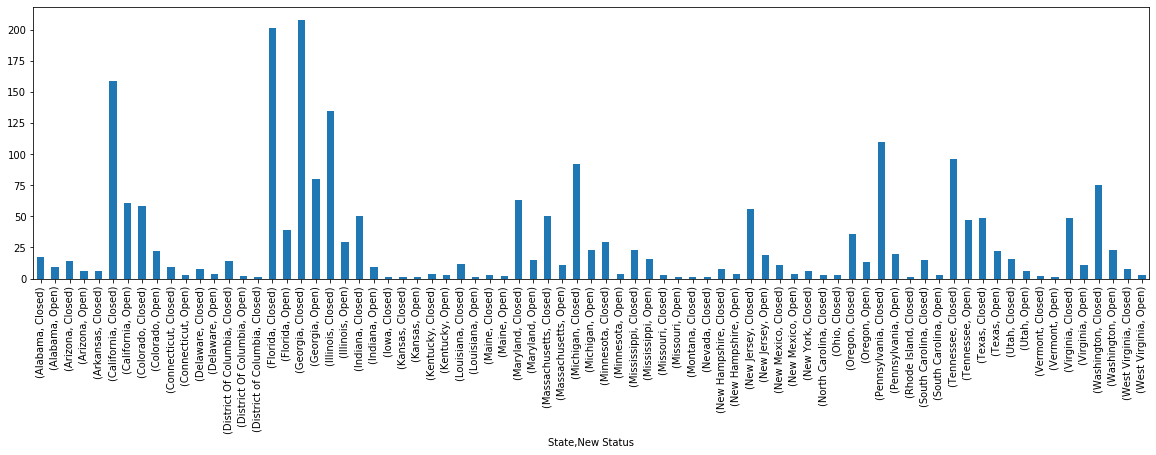

In [27]:
comcast_data_copy2 = comcast_data[['State', 'New Status']].copy()
comcast_data_grp = comcast_data_copy2.groupby(['State','New Status']).size()
plt.figure(figsize=(20,5))
comcast_data_grp.plot.bar()

In [29]:
# copying Ticket Details into previous copy data with state and new status column
comcast_data_copy2['Ticket #'] = comcast_data['Ticket #'].copy() 
comcast_data_copy2

,State,New Status,Ticket #
0,Maryland,Closed,250635
1,Georgia,Closed,223441
2,Georgia,Closed,242732
3,Georgia,Open,277946
4,Georgia,Closed,307175
...,...,...,...
2219,Florida,Closed,213550
2220,Michigan,Closed,318775
2221,Michigan,Closed,331188
2222,Michigan,Closed,360489


In [30]:
# grouping data by State & new Status and hence calculating no of tickets in that group.Also resetting index
comcast_data_tic_count = comcast_data_copy2.groupby(['State','New Status'])['Ticket #'].count().reset_index()
comcast_data_tic_count

,State,New Status,Ticket #
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6
...,...,...,...
72,Virginia,Open,11
73,Washington,Closed,75
74,Washington,Open,23
75,West Virginia,Closed,8


In [31]:
comcast_data_tic_count.dtypes

State         object
New Status    object
Ticket #       int64
dtype: object

In [32]:
# Which state has max complaints - grouping by state and then having a count by no of ticket.Then resetting index.
max_complaint_data = comcast_data_copy2.groupby(['State'])['Ticket #'].count().reset_index()
max_complaint_data

,State,Ticket #
0,Alabama,26
1,Arizona,20
2,Arkansas,6
3,California,220
4,Colorado,80
5,Connecticut,12
6,Delaware,12
7,District Of Columbia,16
8,District of Columbia,1
9,Florida,240


In [33]:
# get state with max tickets. 
max_complaint_sorted_data = max_complaint_data.sort_values(by='Ticket #',ascending= False)
max_complaint_sorted_data.iloc[0,:]

State       Georgia
Ticket #        288
Name: 10, dtype: object

In [41]:
# fetching open tickets for each state
list_open_tic = ['Open'] # creating a list with status as Open and then checking under new status column wether its present or not
comcast_data_open_tic = comcast_data_tic_count[comcast_data_tic_count['New Status'].isin(list_open_tic)]    
comcast_data_open_tic.columns = ['State', 'New Status', 'Open Tickets'] 
comcast_data_open_tic

,State,New Status,Open Tickets
1,Alabama,Open,9
3,Arizona,Open,6
6,California,Open,61
8,Colorado,Open,22
10,Connecticut,Open,3
12,Delaware,Open,4
14,District Of Columbia,Open,2
17,Florida,Open,39
19,Georgia,Open,80
21,Illinois,Open,29


In [43]:
# merge open tickets and total tickets by left joining both on State
merge_opn_clsd = pd.merge(max_complaint_data, comcast_data_open_tic, on= "State",how = "left")
merge_opn_clsd = merge_opn_clsd.drop('New Status',axis=1) # dropping New Status Column
merge_opn_clsd.fillna(0,inplace=True)
merge_opn_clsd

,State,Ticket #,Open Tickets
0,Alabama,26,9.0
1,Arizona,20,6.0
2,Arkansas,6,0.0
3,California,220,61.0
4,Colorado,80,22.0
5,Connecticut,12,3.0
6,Delaware,12,4.0
7,District Of Columbia,16,2.0
8,District of Columbia,1,0.0
9,Florida,240,39.0


In [49]:
# calculate percentage and sort based on percentage
merge_opn_clsd['Percentage'] = (merge_opn_clsd['Open Tickets'] / data10['Ticket #']) * 100
merge_opn_clsd

,State,Ticket #,Open Tickets,Percentage
0,Alabama,26,9.0,34.615385
1,Arizona,20,6.0,30.000000
2,Arkansas,6,0.0,0.000000
3,California,220,61.0,27.727273
4,Colorado,80,22.0,27.500000
5,Connecticut,12,3.0,25.000000
6,Delaware,12,4.0,33.333333
7,District Of Columbia,16,2.0,12.500000
8,District of Columbia,1,0.0,0.000000
9,Florida,240,39.0,16.250000


In [50]:
sorted_data_percnt = merge_opn_clsd.sort_values(by='Percentage',ascending= False)
sorted_data_percnt.iloc[0,:]

State           Kansas
Ticket #             2
Open Tickets         1
Percentage          50
Name: 14, dtype: object

In [51]:
# Provide the percentage of complaints resolved till date, which were received through the 
# Internet and customer care calls.

In [52]:
# get the count of tickets received via internet and customer calls
list_int_ccc = ['Internet','Customer Care Call'] # creating list for internet and cc call
data_rec_via_in_lst = comcast_data[comcast_data['Received Via'].isin(list_int_ccc)]  # checking wether received via is in list
data_rec_via = data_rec_via_in_lst.groupby("Received Via") # grouping by received via
count_int = data_rec_via.get_group("Internet")['Ticket #'].count()c
count_ccc = data_rec_via.get_group("Customer Care Call")['Ticket #'].count() # count of cc call ticket

# converting to dataframe
df_int_ccc = pd.DataFrame({'Received Via':["Internet","Customer Care Call"],'Count':[count_int,count_ccc]})
df_int_ccc

,Received Via,Count
0,Internet,1105
1,Customer Care Call,1119


In [53]:
# group by status and received Via and fetch closed tickets total
list_closed = ['Closed'] # creating list for closed tickets
data_new_stats = comcast_data[comcast_data['New Status'].isin(list_closed)] # checking whether New Status contains value in list
data_rec_via_grp = data_new_stats.groupby("Received Via") # grouping by received via
count_int = data_rec_via_grp.get_group("Internet")['Ticket #'].count()           # count of internet ticket
count_ccc = data_rec_via_grp.get_group("Customer Care Call")['Ticket #'].count() # count of cc call ticket

# converting to dataframe
df_int_ccc_new = pd.DataFrame({'Received Via':["Internet","Customer Care Call"],'Count':[count_int,count_ccc]})
df_int_ccc_new.columns = ['Received Via','Closed Count'] # Adding two New Columns
df_int_ccc_new

,Received Via,Closed Count
0,Internet,843
1,Customer Care Call,864


In [54]:
# mergeing both dataframes 
df_merge_int_ccc = pd.merge(df_int_ccc,df_int_ccc_new,on = "Received Via")
df_merge_int_ccc

# calculating percentage
df_merge_int_ccc['Percentage'] = (df_merge_int_ccc['Closed Count']/ df_merge_int_ccc['Count']) * 100
df_merge_int_ccc

,Received Via,Count,Closed Count,Percentage
0,Internet,1105,843,76.289593
1,Customer Care Call,1119,864,77.211796
